In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import time

import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
import qiskit as qiskit
import qiskit.quantum_info as qi
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
import Ramsey_ExperimentV2
import random
import importlib
from tqdm import tqdm
import ramsey_experiment

# Loading your IBM Quantum account(s)
IBMQ.save_account(os.environ.get('IBM_KEY'), overwrite=True)
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-research')




C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
ibmqfactory.load_account:WARNING:2024-01-14 15:46:30,606: Credentials are already in use. The existing account in the session will be replaced.


In [7]:
import Ramsey_ExperimentV2
import random
import importlib
from tqdm import tqdm
import numpy as np
ramsey_experiment = importlib.reload(Ramsey_ExperimentV2)
RamseyExperiment = ramsey_experiment.RamseyExperiment
RamseyBatch = ramsey_experiment.RamseyBatch

In [18]:
n = 5
shots = 1000
T = 3*np.pi
dist_decay = []
dist_w = []
dist_j = []
measurements = np.arange(5,100,5)
repetitions = 10
mean_w_dist = []
mean_decay_dist = []
mean_j_dist = []
for i in range(repetitions):
    W = [random.gauss(3, 1) for _ in range(n)]
    L = [random.gauss(1, 1) for _ in range(n)]
    J = [random.gauss(3, 1) for _ in range(n - 1)]
    dist_decay = []
    dist_w = []
    dist_j = []
    for m in measurements:
        batch_det = []
        batch_cross = []
        delay = np.linspace(0, T, m)
        for t in tqdm(delay, desc='Creating experiments'):
            exp_det = RamseyExperiment(n, t, shots, J, W, L)
            exp_det.create_circuit_detuning()
            exp_det.add_decay_raw()
            batch_det.append(exp_det)

            exp_cross = RamseyExperiment(n, t, shots, J, W, L)
            exp_cross.create_circuit_crosstalk()
            exp_cross.add_decay_raw()
            batch_cross.append(exp_det)

        batch_det = RamseyBatch(batch_det)
        params_det = batch_det.fit_to_theory()
        batch_cross = RamseyBatch(batch_cross)
        params_cross = batch_cross.fit_to_theory()
        W_fit = [params_det[i][1] for i in range(n)]
        #J_fit = [params_cross[i][1] - params_det[i][1] for i in range(n)]
        decay_fit = [params_det[i][0] for i in range(n)]


        dist_w.append(batch_det.calc_dist(W_fit,W))
        dist_decay.append(batch_det.calc_dist(decay_fit,L))
    mean_decay_dist.append(dist_decay)
    mean_w_dist.append(dist_w)
    #dist_j.append(batch_det.calc_dist(J_fit,J))




Creating experiments:   0%|          | 0/5 [00:00<?, ?it/s]C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)
Creating experiments: 100%|██████████| 5/5 [00:00<00:00,  5.80it/s]
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
Creating experiments: 100%|██████████| 95/95 [00:17<00:00,  5.34it/s]


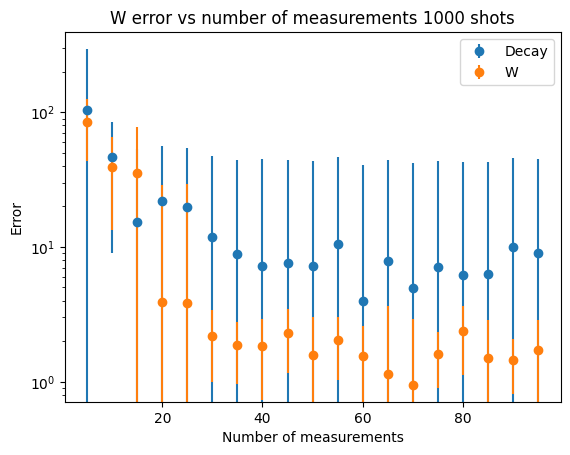

In [30]:
import matplotlib.pyplot as plt
w_dist_reshaped = list(map(list, zip(*mean_w_dist)))
w_error = [np.median(np.array(w_dist_reshaped[i])) for i in range(len(w_dist_reshaped))]
w_std = [np.std(np.array(w_dist_reshaped[i])) for i in range(len(w_dist_reshaped))]

plt.title('W error vs number of measurements 1000 shots')
plt.xlabel('Number of measurements')
plt.ylabel('Error')
decay_dist_reshaped = list(map(list, zip(*mean_decay_dist)))
decay_error = [np.median(np.array(decay_dist_reshaped[i])) for i in range(len(decay_dist_reshaped))]
decay_std = [np.std(np.array(decay_dist_reshaped[i])) for i in range(len(decay_dist_reshaped))]
plt.errorbar(measurements, decay_error, yerr=decay_std, fmt='o', label='Decay')
plt.errorbar(measurements, w_error, yerr=w_std, fmt='o', label='W')
plt.semilogy()
#plt.ylim([0,100])
plt.legend()